In [ ]:
#Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#             To predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [ ]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.svm import SVR
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Get the stock quote
df = web.DataReader('AAPL',data_source='yahoo', start='2012-01-01', end='2020-12-24')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.669562
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.737655
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.879071
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.013705
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,12.993064
...,...,...,...,...,...,...
2020-12-17,129.580002,128.039993,128.899994,128.699997,94359800.0,128.699997
2020-12-18,129.100006,126.120003,128.960007,126.660004,192541500.0,126.660004
2020-12-21,128.309998,123.449997,125.019997,128.229996,121251600.0,128.229996


In [ ]:
#Get the number of rows and columns in the data set
df.shape

(2260, 6)

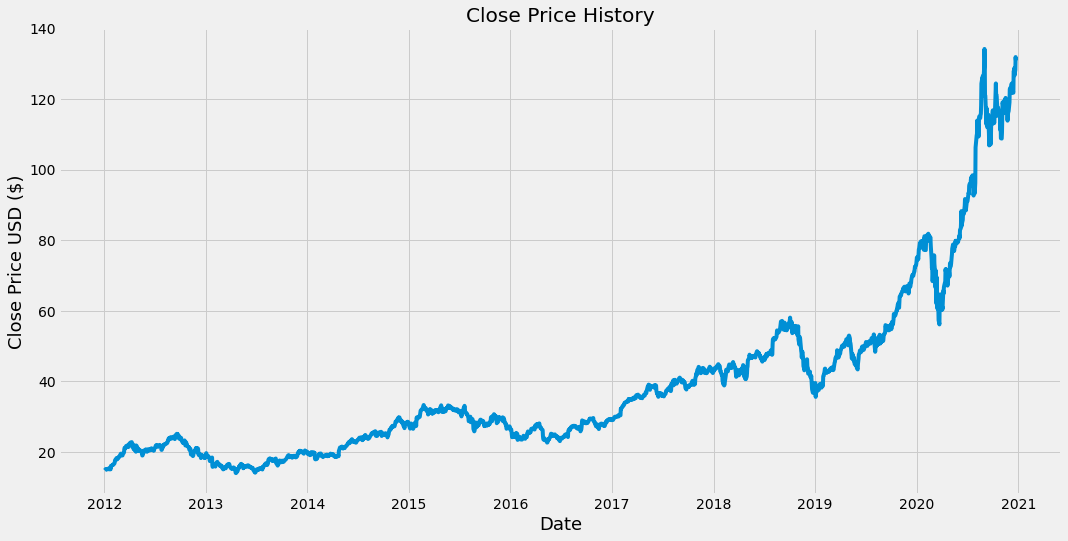

In [ ]:
#visualise the closing price history
figsize=0,0
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the numbe of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)          
training_data_len          

1808

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
#Compute the minimum and maximum values to be used for scaling and then transforms the data based on the values (0-1)
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[0.0061488 ],
       [0.00680527],
       [0.00816869],
       ...,
       [0.95051257],
       [0.9808705 ],
       [0.97321867]])

In [ ]:
#Create the training dataset
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.0061488 , 0.00680527, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869744, 0.01014998,
       0.01145994, 0.01105596, 0.00884299, 0.01095496, 0.00887566,
       0.01667305, 0.01607005, 0.01685722, 0.01855928, 0.01959001,
       0.01950387, 0.01918604, 0.02054056, 0.02181487, 0.02325851,
       0.0255903 , 0.03048855, 0.03056281, 0.03328967, 0.03532738,
       0.03182524, 0.03317382, 0.03314709, 0.03692846, 0.0363908 ,
       0.03738589, 0.0391741 , 0.0401692 , 0.04303567, 0.04512389,
       0.04572687, 0.04593778, 0.04236733, 0.04150589, 0.04163362,
       0.04499021, 0.04593482, 0.04796361, 0.05274602, 0.05912652,
       0.0579324 , 0.05793537, 0.06254846, 0.06399208, 0.06296431,
       0.06202567, 0.06104839, 0.06429507, 0.06652291, 0.06745562])]
[0.06515055661523342]

[array([0.0061488 , 0.00680527, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869744, 0.01014998,
       0.01145994, 0.01105596, 0.00

In [ ]:
#Convert the x_train and y_train datasets to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1748, 60, 1)

In [ ]:
#Build the LSTM and rbf model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))



In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
#fit another name for train
#batch_size is the total number of training examples present in a single batch
#epochs is the number of iterations when an entire dataset is passed forwards and backwards through a neural network
model.fit(x_train, y_train, batch_size=1, epochs=1)

1748/1748 [==============================] - 43s 23ms/step - loss: 0.0010


In [ ]:
#Create the testing dataset
#Create a new array containing scaled values from index 1748 to 2260
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
#y_test will be all of the values that we want our model to predict
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)
#Converting to a numpy array so that we can use it in the LSTM model

In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#                            No of Rows       No of columns   #Close price

In [ ]:
#Get the model's predicted price values
predictions = model.predict(x_test)
#Unscale the values
#We want predictions to contain the same values as our y_test dataset
#We are getting these values based of the x_test dataset
predictions = scaler.inverse_transform(predictions)
 

In [ ]:
#Evaluate our model
#Get the root mean squared error (RMSE)
#Lower the value the more accurate the predictions
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

3.8984590969254485

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


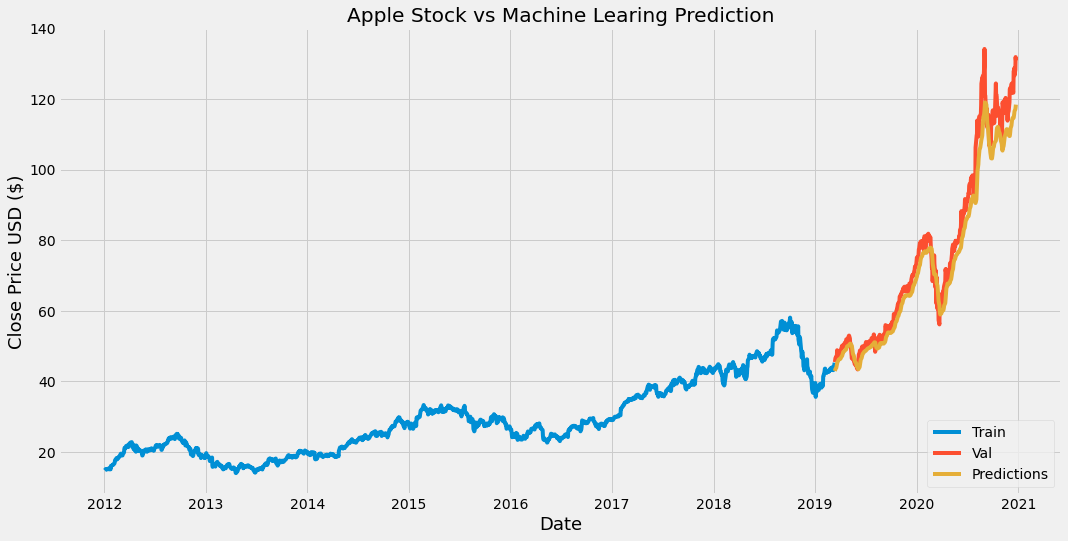

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualise the data
plt.figure(figsize=(16,8))
plt.title('Apple Stock vs Machine Learing Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid predicted prices
valid

,Close,Predictions
Date,,
2019-03-13,45.427502,42.894131
2019-03-14,45.932499,43.141659
2019-03-15,46.529999,43.448956
2019-03-18,47.005001,43.816631
2019-03-19,46.632500,44.228539
...,...,...
2020-12-17,128.699997,115.751320
2020-12-18,126.660004,116.506752
2020-12-21,128.229996,117.057678


In [ ]:
#Predict the closing price for apple stock for date
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-12-24')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values betweeen 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days to the X_test list
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data to be 3d
X_test - np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scale price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
#This is what the model belives the predicted price will be for date
print(pred_price)

[[119.1474]]


In [ ]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-12-24', end='2020-12-24')
print(apple_quote2['Close'])

Date
2020-12-23    130.960007
Name: Close, dtype: float64
